## 0 读取数据

我选择的是 `college` 这个数据集。该数据集包含摘自《美国新闻与世界报道》1995年刊的美国高校统计数据: 

| 数据域名称 | 含义 |
|-----|-----|
| `Private` | 二分变量，以"No"和"Yes"标识私立或公立大学   |
| `Apps` | 收到的申请数量   |
| `Accept` | 录取的申请数量   |
| `Enroll` | 入学新生数量   |
| `Top10perc` | 高中排名前10%的新生百分比   |
| `Top25perc` | 高中排名前25%的新生百分比   |
| `F.Undergrad` | 全日制本科学生人数   |
| `P.Undergrad` | 非全日制本科学生人数   |
| `Outstate` | 外州学生学费   |
| `Room.Board` | 食宿费用   |
| `Books` | 预估书本费用   |
| `Personal` | 预估个人开销   |
| `PhD` | 拥有博士学位的教师比例   |
| `Terminal` | 拥有最高学位的教师比例   |
| `S.F.Ratio` | 师生比例   |
| `perc.alumni` | 捐赠校友比例   |
| `Expend` | 生均教学支出   |
| `Grad.Rate` | 毕业率 |

我们希望了解其他特征域的值对毕业率的影响。

In [2]:
import pandas as pd # type: ignoreselect
college = pd.read_csv('college.csv')

In [3]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


将第一列的列明改为 `College`

In [4]:
college.rename({'Unnamed: 0': 'College'}, axis=1, inplace=True)
college.set_index('College', inplace=True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


将 `Private` 字段映射为 `bool` 值变量

In [5]:
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


使用 `DataFrame.describe()` 函数获取每个特征域的各统计量

In [6]:
college.describe(include= "all")

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## 1 探索性数据分析

下面对上述 `describe()` 的结果进行分析。

整体概述

这份数据描述了777所美国大学在1995年的各项指标。数据包含分类变量（如Private）和数值变量。describe()函数为数值变量提供了丰富的统计信息，让我们能够快速了解数据的中心趋势、离散程度和分布形态。

分变量详细分析

1. 学校基本属性

* Private
    * 分析： 这是一个分类变量，describe() 显示其唯一值（unique）为2（Yes/No），其中 top 值为 True（即"Yes"），频数（freq）为565。
    * 结论： 数据集中私立大学占绝大多数。565所私立大学 / 777所总数 ≈ 72.7% 的学校是私立的。

2. 招生情况

* Apps（申请数）， Accept（录取数）， Enroll（入学数）

    * 平均数： 平均每所大学收到3001份申请，录取2018人，最终有779人入学。

    * 统计行为：
        * 差异巨大： 三个变量的标准差（std）都非常大，几乎接近甚至超过其平均值（例如Apps的std=3870 > mean=3001）。这表明不同大学的招生规模存在天壤之别。最大值（Apps max=48,094）和最小值（Apps min=81）也印证了这一点。

        * 录取与入学率： 我们可以粗略计算：

            * 平均录取率 = Accept / Apps ≈ 2018 / 3001 ≈ 67.3%

            * 平均入学率/报到率 = Enroll / Accept ≈ 779 / 2018 ≈ 38.6%

        * 分布形态： 中位数（50%）远小于平均数（均值）。例如，Apps的中位数是1558，但均值是3001。这意味着有少量大学拥有极其庞大的申请量（极右偏分布），拉高了整体平均值。大部分大学的申请数集中在较低水平（一半的大学申请数少于1558）。

3. 生源质量

* Top10perc（高中前10%）， Top25perc（高中前25%）

    * 平均数： 平均而言，新生中有27.6%来自高中排名前10%的学生，55.8%来自前25%的学生。

    * 统计行为： 分布相对均匀（标准差小于均值），Top25perc的中位数（54%）和均值（55.8%）很接近，说明分布相对对称。而Top10perc的中位数（23%）低于均值（27.6%），表明存在一些顶尖生源高度集中的大学，使分布轻微右偏。

4. 学生与教师规模

* F.Undergrad（全日制本科）， P.Undergrad（非全日制本科）

    * 平均数： 平均全日制本科生为3699人，非全日制为855人。

    * 统计行为： 同样呈现出极大的差异（标准差很大）。全日制学生的规模分布极右偏（中位数1707 << 均值3699），说明少数大型大学主导了数据。非全日制学生的最大值（21,836）和标准差（1522）表明，不同大学在教学模式上差异显著。

* S.F.Ratio（师生比）

    * 平均数： 平均师生比为14.09（即平均每14名学生对应1名教师）。

    * 统计行为： 分布相对集中（标准差3.96），中位数（13.6）和均值（14.09）接近，大部分学校的师生比在11.5到16.5之间（25%-75%分位数）。

5. 费用与开支

* Outstate（外州学费）， Room.Board（食宿费）， Books（书本费）， Personal（个人开销）， Expend（生均支出）

    * 平均数： 外州学费平均为10,441，食宿费为4,358，书本费为549，个人开销为1,341，生均教学支出为$9,660。

    * 统计行为：

        * 学费和支出差异显著： Outstate和Expend的标准差非常大，表明大学的收费水平和资源投入相差悬殊。Expend的最大值（56,233）是均值（9,660）的5倍多，再次印证了资源的高度不平等。

        * 固定费用相对稳定： Room.Board和Books的分布相对集中，说明这些基础生活成本在不同大学间差异较小。

        * 分布形态： Outstate和Expend的分布明显右偏（中位数 < 均值），说明有一小部分高学费、高支出的精英大学。

6. 师资力量

* PhD（拥有博士学位教师比例）， Terminal（拥有终极学位教师比例）

    * 平均数： 平均72.7%的教师拥有博士学位，79.7%拥有终极学位（通常指本领域的最高学位，如博士、艺术硕士MFA等）。

    * 统计行为： 分布较为集中，大部分大学的教师博士学位比例在62%到85%之间（25%-75%分位数），师资队伍整体素质较高且在不同大学间相对均衡。Terminal的比例普遍高于PhD，这是合理的。

7. 学校成果与声誉

* perc.alumni（捐赠校友比例）

    * 平均数： 平均22.7%的校友会捐款。

    * 统计行为： 分布较为分散，不同大学的校友捐赠文化和忠诚度差异很大。

* Grad.Rate（毕业率）

    * 平均数： 平均毕业率为65.5%。

    * 统计行为：

        * 异常值： 最大值118%是一个明显的异常值，因为毕业率不可能超过100%。这可能是数据录入错误，或者计算方法特殊（例如包含了超期毕业的学生），需要进一步核查。

        * 分布： 剔除异常值影响，毕业率的分布相对正常，中位数（65%）与均值（65.5%）基本一致，表明分布大致对称。但毕业率本身在不同大学间差异不小（标准差17.2%）。

总结

1.  数据构成： 数据集以私立大学为主（72.7%）。
2.  极度不均衡： 大学在规模（申请数、学生人数）和资源（学费、支出）上表现出极端的差异，存在明显的“头部效应”。大部分统计量的平均值都被少数大型/富裕的大学拉高，中位数通常能更好地代表“典型”大学的情况。
3.  招生漏斗： 从申请到录取再到入学，数量大幅减少，平均入学率仅为38.6%。
4.  潜在数据问题： Grad.Rate存在超过100%的异常值，需要在后续分析中处理。
5.  相对稳定的指标： 师生比（S.F.Ratio）、师资博士比例（PhD, Terminal）、基础生活成本（Room.Board, Books）等指标在不同大学间的分布相对集中。

(d) Use the `pd.plotting.scatter_matrix()` function to produce a
scatterplot matrix of the frst columns `[Top10perc, Apps, Enroll]`.
Recall that you can reference a list `C` of columns of a data frame
`A` using `A[C]`.

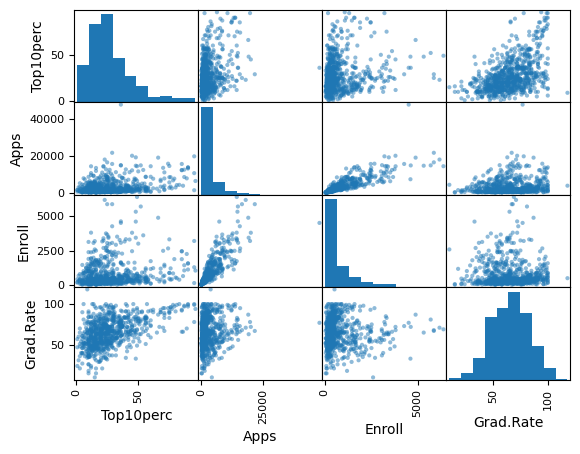

In [7]:
pd.plotting.scatter_matrix(college[[
    "Top10perc", 
    "Apps", 
    "Enroll",
    "Grad.Rate"
]]);

In [8]:
college.corr()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,1.000000,-0.432095,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461,0.336162
Apps,-0.432095,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,-0.475252,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,-0.567908,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.164132,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.095752,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,-0.615561,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,-0.452088,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.552650,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.340532,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942


In [9]:
college.corr()["Grad.Rate"].abs() > 0.4

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc       True
Top25perc       True
F.Undergrad    False
P.Undergrad    False
Outstate        True
Room.Board      True
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni     True
Expend         False
Grad.Rate       True
Name: Grad.Rate, dtype: bool

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

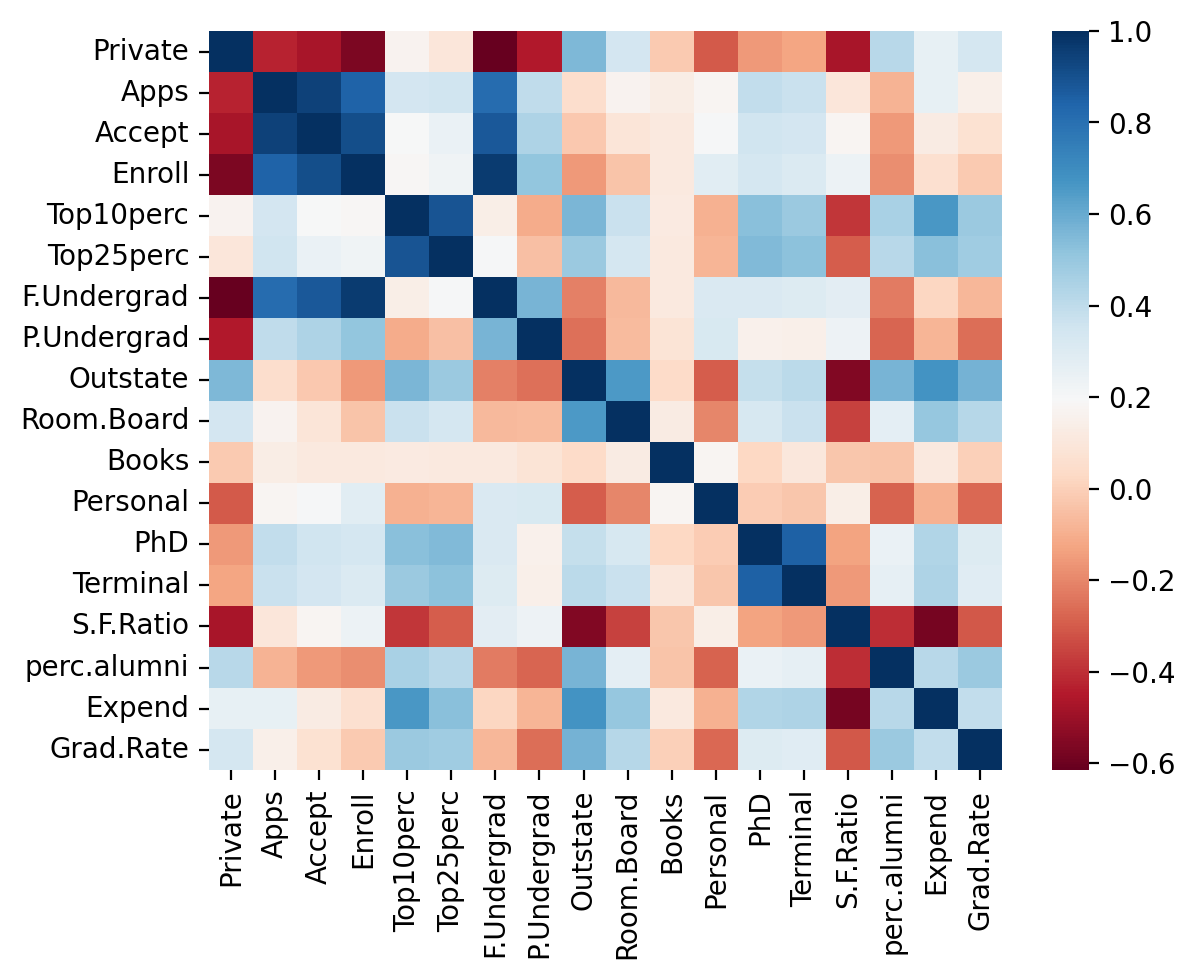

In [11]:
plt.figure(dpi=200)
sns.heatmap(college.corr(), ax=plt.gca(), cmap="RdBu")

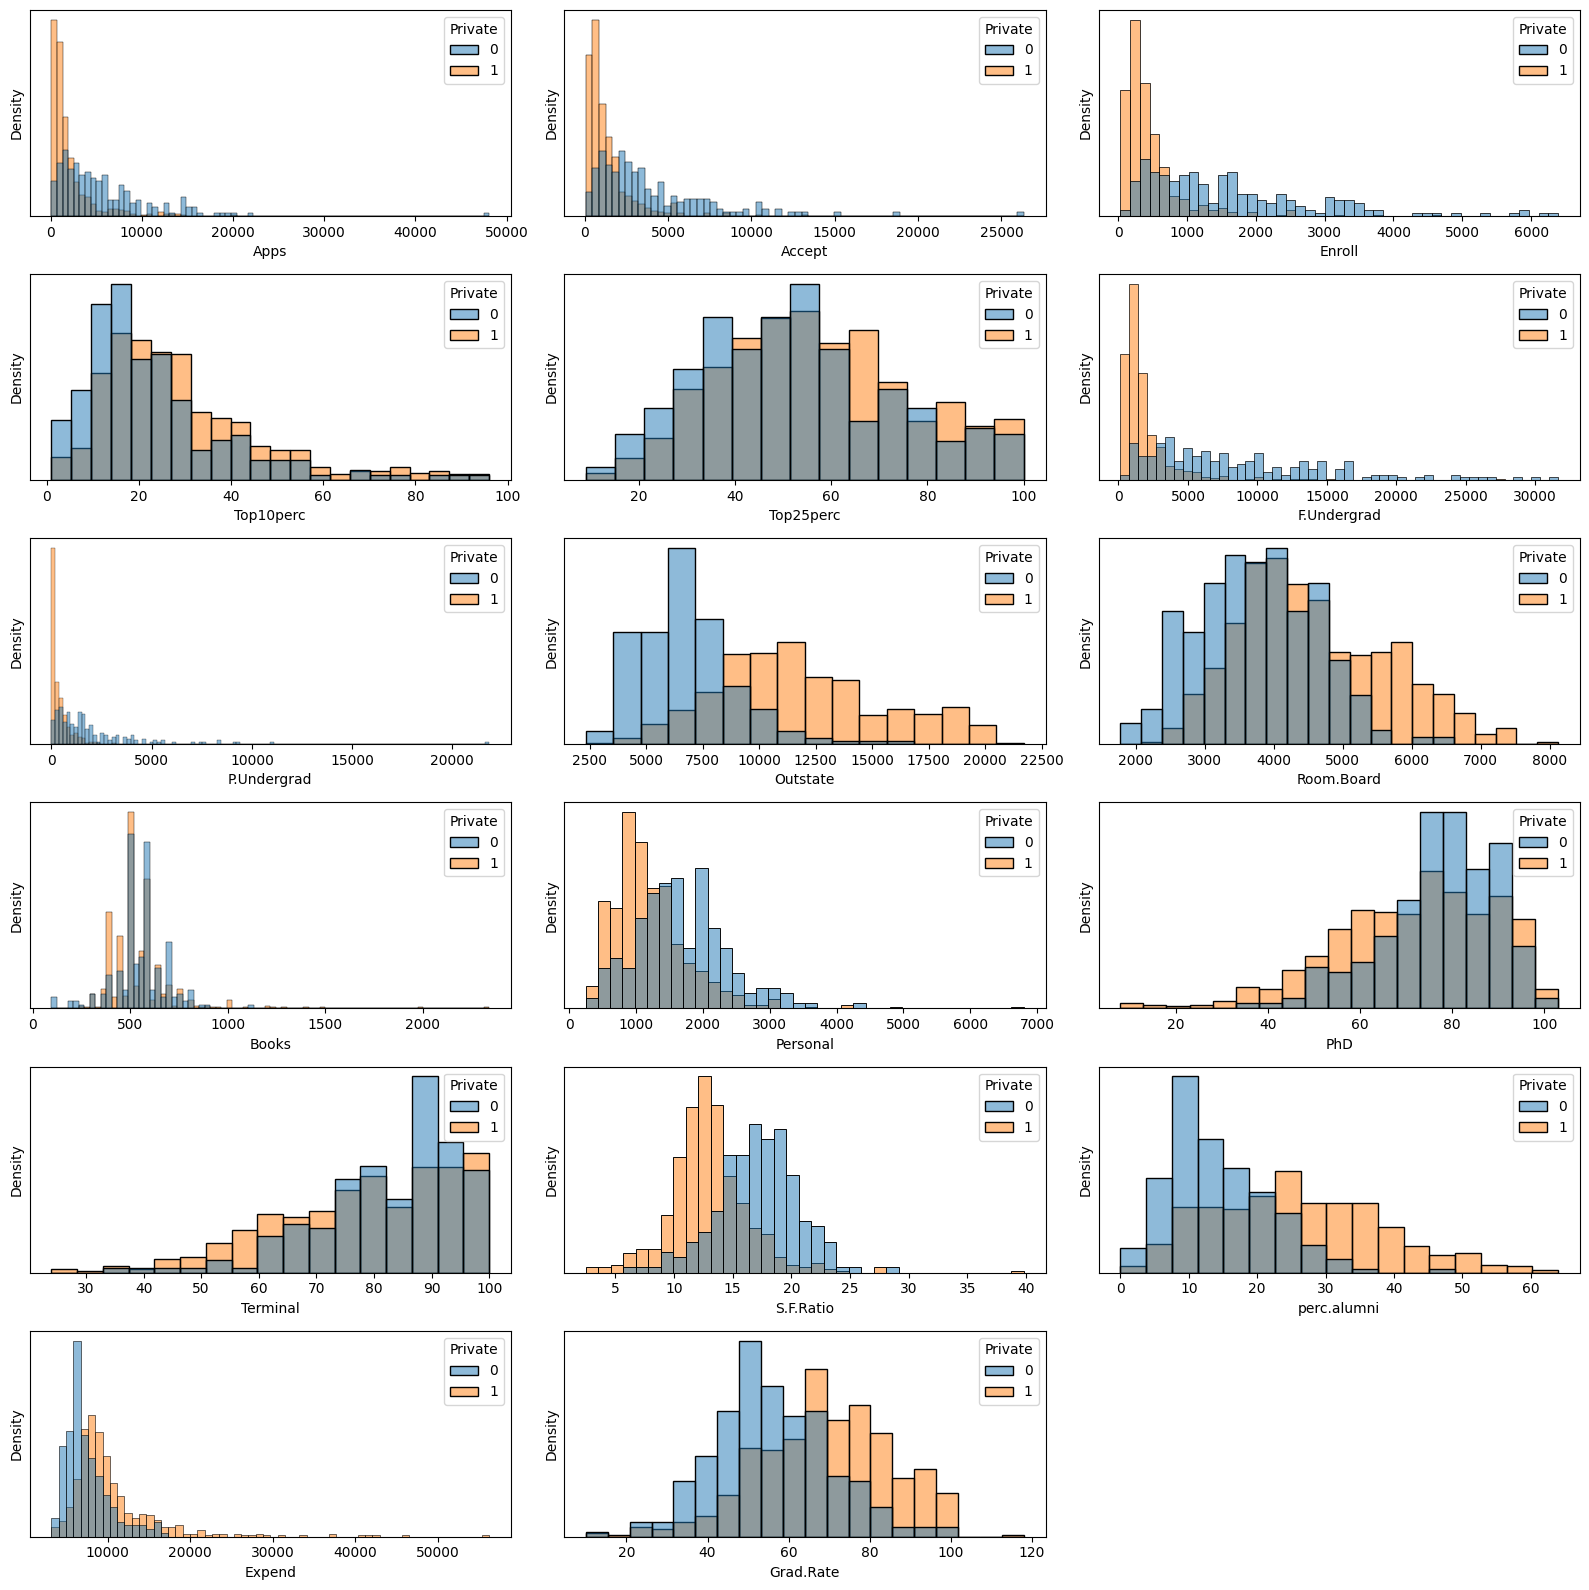

In [12]:
from typing import List
from matplotlib.axes import Axes

fig, axs = plt.subplots(6, 3, figsize=(16, 16))
axs: List[Axes] = axs.flatten()

for (idx, col) in enumerate(college.columns[1:]):
    sns.histplot(data=college, x=col, hue='Private', stat='density', common_norm=False, ax=axs[idx])
    axs[idx].set_yticks([])
    # if college[col].max() > 100 * college[col].min():
    #     axs[idx].semilogy()
axs[-1].axis("off")

plt.tight_layout()

In [13]:
def classify_graduate_slot(a: int) -> str:
    type_ = a // 20
    return f"{(type_) * 20:d}-{(type_+1) * 20:d}%"


In [14]:
college["graduate_slot"] = college["Grad.Rate"].apply(classify_graduate_slot)

In [15]:
set(college["graduate_slot"])

{'0-20%', '100-120%', '20-40%', '40-60%', '60-80%', '80-100%'}

In [16]:
# Top10perc       True
# Top25perc       True
# Outstate        True
# Room.Board      True
# perc.alumni     True
# Grad.Rate       True

In [17]:
college_distilled = college[["Private", "Top10perc", "Outstate", "Room.Board", "perc.alumni", "graduate_slot"]]

In [18]:
college_distilled["Outstate/250"] = college_distilled["Outstate"] / 250
college_distilled["Room.Board/80"] = college_distilled["Room.Board"] / 80

college_distilled.drop(columns=["Outstate", "Room.Board"], inplace=True)

C:\Users\Gravitas\AppData\Local\Temp\ipykernel_29296\930274014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_distilled["Outstate/250"] = college_distilled["Outstate"] / 250
C:\Users\Gravitas\AppData\Local\Temp\ipykernel_29296\930274014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_distilled["Room.Board/80"] = college_distilled["Room.Board"] / 80
C:\Users\Gravitas\AppData\Local\Temp\ipykernel_29296\930274014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [19]:
from collections import Counter

Counter(college_distilled["Private"])

Counter({1: 565, 0: 212})

In [20]:
weights = college_distilled["Private"].map({1: 0.273, 0:0.727})

d:\Research\Mathematics\SYSU_GBU\3_Learn\2_Lectures\0_MachineLearning\1_Midterm_homework\2_code\.venv\lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
d:\Research\Mathematics\SYSU_GBU\3_Learn\2_Lectures\0_MachineLearning\1_Midterm_homework\2_code\.venv\lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
d:\Research\Mathematics\SYSU_GBU\3_Learn\2_Lectures\0_MachineLearning\1_Midterm_homework\2_code\.venv\lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
d:\Research\Mathematics\SYSU_GBU\3_Learn\2_Lectures\0_MachineLearning\1_Midterm_homework\2_code\.venv\lib\site-p

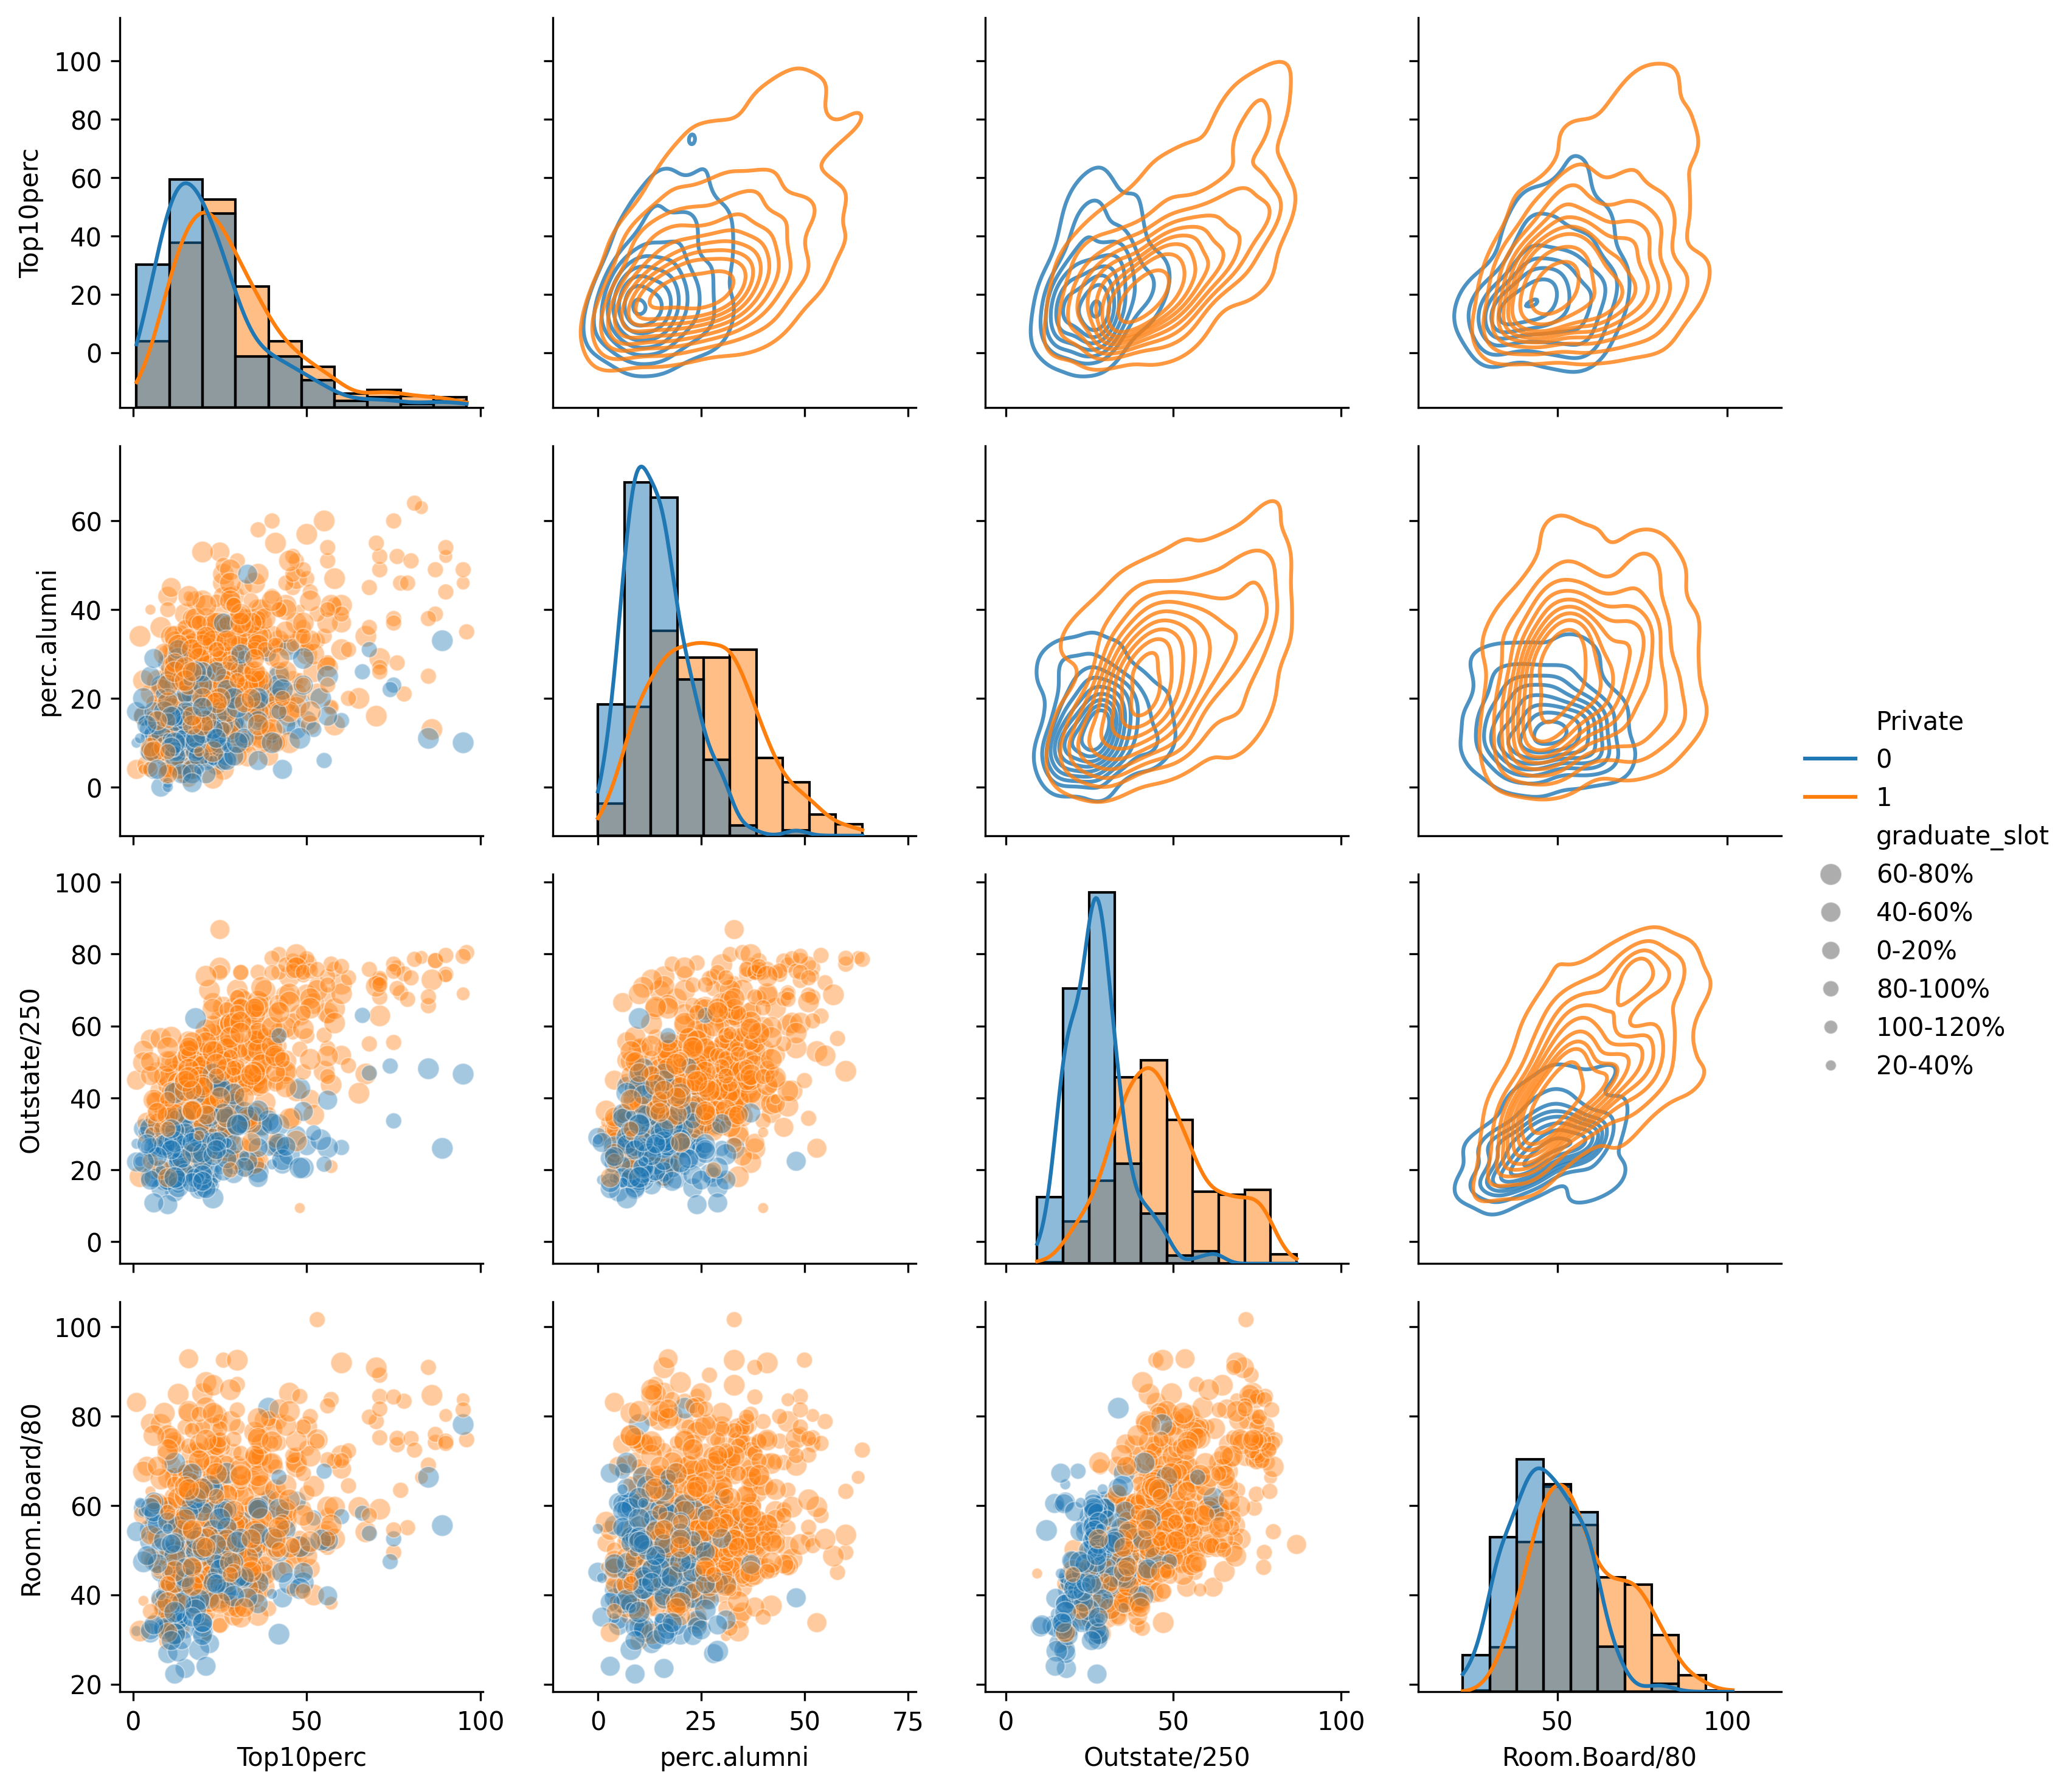

In [21]:
from functools import partial

g = sns.PairGrid(college_distilled, hue="Private");

plt.gcf().set_dpi(300)

g.map_diag(partial(sns.histplot, stat="density", weights=weights, kde=True));
g.map_lower(sns.scatterplot, size=college_distilled["graduate_slot"], alpha=0.4);
g.map_upper(sns.kdeplot, size=college_distilled["graduate_slot"], alpha=0.8);
g.add_legend(title="", adjust_subtitles=True);

# 正态性检验


In [30]:
from scipy.stats import kstest

for col in college.columns[:-1]:
    kstest_result = kstest(college[col], cdf="norm")
    print(f"[ {col} ], [{kstest_result.statistic:.2f}], [ {kstest_result.pvalue:.4f} ], ")

[ Private ], [0.57], [ 0.0000 ], 
[ Apps ], [1.00], [ 0.0000 ], 
[ Accept ], [1.00], [ 0.0000 ], 
[ Enroll ], [1.00], [ 0.0000 ], 
[ Top10perc ], [0.99], [ 0.0000 ], 
[ Top25perc ], [1.00], [ 0.0000 ], 
[ F.Undergrad ], [1.00], [ 0.0000 ], 
[ P.Undergrad ], [0.99], [ 0.0000 ], 
[ Outstate ], [1.00], [ 0.0000 ], 
[ Room.Board ], [1.00], [ 0.0000 ], 
[ Books ], [1.00], [ 0.0000 ], 
[ Personal ], [1.00], [ 0.0000 ], 
[ PhD ], [1.00], [ 0.0000 ], 
[ Terminal ], [1.00], [ 0.0000 ], 
[ S.F.Ratio ], [1.00], [ 0.0000 ], 
[ perc.alumni ], [0.99], [ 0.0000 ], 
[ Expend ], [1.00], [ 0.0000 ], 
[ Grad.Rate ], [1.00], [ 0.0000 ], 


# 多重共线性检测

In [ ]:
# perform VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df: pd.DataFrame) -> pd.DataFrame:
    vif_ = pd.DataFrame()
    vif_['index'] = df.columns
    vif_['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif_

auto_dataset_dvif = auto_dataset.copy()
vif = get_vif(auto_dataset_dvif.drop(columns=["mpg"]))
vif

# one can see that there are in the feature columns there are features have high VIF values

# 多元线性回归